## Here I will examine the clustering of the repeat sequences identified by RED.

NOTE*** There is a problem with using VSEARCH for this. . . . when clustering, you normally sort the sequences by length (longest first) before clustering. This way, clusters are usually initiated with long centroids. However, when calling consensuses after clustering, this has resulted in many empty sequences because much of the centroid is not covered by most reads assigned to the cluster (so the consensus for that base is a gap). 

For this reason I think it is best to take the centroid (which is just the sequence at the centre of the cluster). I don't think this is particularly problematic, for the purposes of classifying repeats as these clusters would not be otherwise classifiable and it is very unlikely to give me a fasle positive. . . 

So . . . here I want to look at the number of sequences per cluster, the lenghts of the centroids etc. 



In [140]:
from __future__ import division

In [1]:
wd = "/home/djeffrie/Data/Genomes/Rtemp_hybrid/VSEARCH_repeats"

There are two outputs from Vsearch. 1) the centroids file and 2) the consensus file. The latter contains information on the number of sequences in each cluster. The former has the centroid sequence. I will just take the information from the headers in the consensus file

In [3]:
consensuses = open("%s/ALLconsensuses.fasta" % wd, 'r').readlines()[:10]

In [148]:
from Bio import SeqIO

consensuses = SeqIO.parse(open("%s/ALLconsensuses.fasta" % wd, 'r'), 'fasta')

In [149]:

consensus_dict = {}

for record in consensuses:
    
    cluster_ID = record.id.split("=")[1].split(";")[0]
    N_seqs = record.id.split("=")[2]
    seq_len = len(record.seq)
        
    consensus_dict[cluster_ID] = {}
    consensus_dict[cluster_ID]["Nseqs"] = int(N_seqs)
    consensus_dict[cluster_ID]["cons_length"] = seq_len
    
    if len(record.seq) == 0:
        
        consensus_dict[cluster_ID]["consensus"] = False
        consensus_dict[cluster_ID]["length_diff"] = False
            
    else:
        consensus_dict[cluster_ID]["consensus"] = True
        
        lower = int(record.id.rpartition(":")[2].split(";")[0].split("-")[0])
        upper = int(record.id.rpartition(":")[2].split(";")[0].split("-")[1])
            
        cluster_length = upper - lower
            
        length_diff = consensus_dict[cluster_ID]["cons_length"] / cluster_length
            
        consensus_dict[cluster_ID]["length_diff"] = length_diff
            
        

In [179]:
max(seq_numbers)

18092

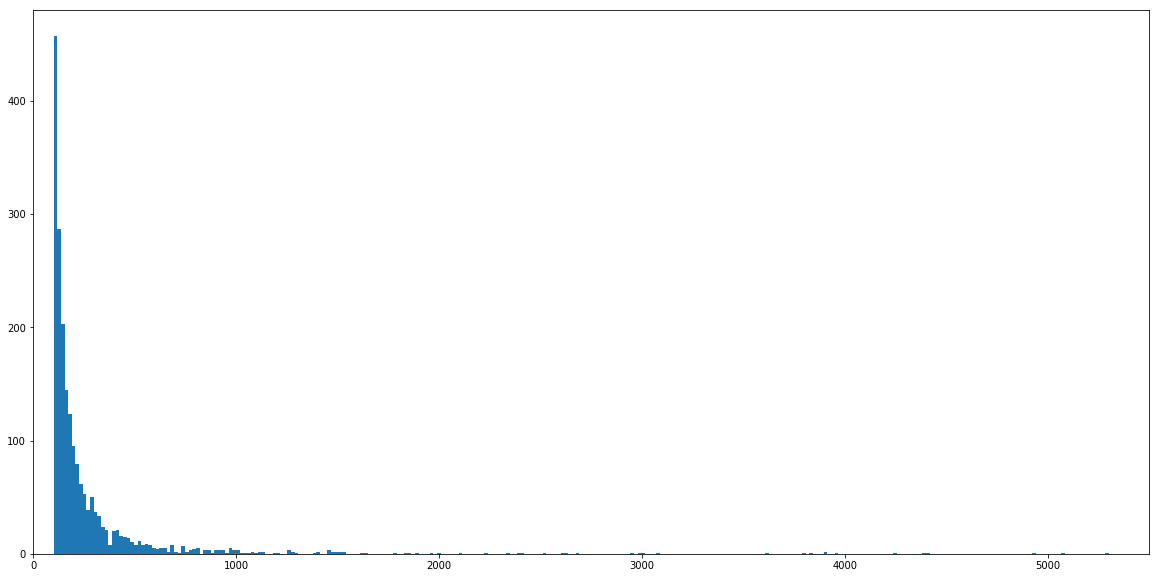

In [185]:
from matplotlib import pyplot as plt

seq_numbers = []

for cluster in consensus_dict:
    if consensus_dict[cluster]["Nseqs"] > 100:
        seq_numbers.append(consensus_dict[cluster]["Nseqs"])


fig = plt.figure(figsize = (20,10))

plt.hist(seq_numbers, bins = 1000)
plt.xlim(0,5500)

plt.show()



Above is the number of sequences per cluster  . . . in a heavily curated subset of the clusters though.

In [164]:
counter = 0
counter1 = 0
counter2 = 0
counter3 = 0

seq_thresh = 20
prop_thresh = 0.5
cons_length_thresh = 100

for cluster in consensus_dict:
    
    if consensus_dict[cluster]["Nseqs"] >= seq_thresh:
        counter += 1
        
        if consensus_dict[cluster]["consensus"] == True:
            counter1 += 1

            if  consensus_dict[cluster]["length_diff"] > prop_thresh:
                counter2 += 1
            
                if consensus_dict[cluster]["cons_length"] >= cons_length_thresh:
                    counter3 += 1
        
                    #print "Cluster %s has %s sequences and a consensus length of %s (%s of centroid)" % (cluster, consensus_dict[cluster]["Nseqs"], consensus_dict[cluster]["cons_length"], consensus_dict[cluster]["length_diff"])
                    
print "There are %s clusters with more than %s sequences in them" % (counter, seq_thresh)
print "Of these, there are %s with consensus loci" % counter1
print "Of these, there are %s with consensus length > %s of the centroid" % (counter2, prop_thresh)
print "Of these, %s have consensus lengths > %s" % (counter3, cons_length_thresh)

There are 23301 clusters with more than 20 sequences in them
Of these, there are 15668 with consensus loci
Of these, there are 1494 with consensus length > 0.5 of the centroid
Of these, 1290 have consensus lengths > 100


So, the consensus sequences are really a problem - they just aren't covering much of the centroid, and I don't know what the consensus process is doing - is it just removing all gaps? And is that at all ok? 

I just don't know what to do with these clusters - I don't think I can rescue them in any way other than making arbitrary decisions about N seqs per cluster, amount of centroid that the consensus covers. . . . etc.